# 졸음운전사고에 대한 사망자수

### 1. 데이터 확인

In [2]:
import pandas as pd

In [3]:
#교통사고 데이터 로드
df_accident = pd.read_csv("교통사고통계.csv", encoding='CP949', header=0)

# 졸음운전사고 데이터 로드
df_sleep1 = pd.read_csv("졸음운전교통사고_2014.csv", encoding='CP949', header=0)
df_sleep2 = pd.read_csv("졸음운전교통사고_2019.csv", encoding='CP949', header=0)

In [4]:
# 데이터 확인
display(df_accident)
display(df_sleep1)
display(df_sleep2)

,발생년,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,2015,232035,4621,92522,233646,24232
1,2016,220917,4292,82463,226283,22974
2,2017,216335,4185,78212,223200,21417
3,2018,217148,3781,74258,227511,21268
4,2019,229600,3349,72306,245524,23882


,구분,사고(건),사망(명),부상(명)
0,2014-01-01,169,7,347
1,2014-02-01,145,3,268
2,2014-03-01,206,12,358
3,2014-04-01,182,4,360
4,2014-05-01,218,17,474
5,2014-06-01,233,13,457
6,2014-07-01,229,14,431
7,2014-08-01,222,9,447
8,2014-09-01,225,15,430
9,2014-10-01,210,14,392


,구분,도로종류,사고(건),사망(명),부상(명)
0,2017년,일반국도,363,19,698
1,2017년,지방도,230,10,451
2,2017년,특별광역시도,590,12,1189
3,2017년,시도,577,11,1125
4,2017년,군도,101,3,169
5,2017년,고속국도,120,22,273
6,2017년,기타,21,0,41
7,2018년,일반국도,249,18,487
8,2018년,지방도,170,11,359
9,2018년,특별광역시도,329,4,710


### 2. 데이터 전처리

In [5]:
# 교통사고 데이터 컬럼 수정
df_accident['부상자수'] = df_accident['중상자수'] + df_accident['경상자수'] + df_accident['부상신고자수']
df_accident = df_accident[['발생년', '사고건수', '사망자수', '부상자수']]

# 졸음운전 데이터 컬럼 수정
df_sleep1 = df_sleep1[['구분', '사고(건)', '사망(명)', '부상(명)']]
df_sleep1.columns = ['발생년', '사고건수', '사망자수', '부상자수']

df_sleep2 = df_sleep2[['구분', '사고(건)', '사망(명)', '부상(명)']]
df_sleep2.columns = ['발생년', '사고건수', '사망자수', '부상자수']

In [6]:
# 졸음운전 1 데이터 '발생년' 전처리
df_sleep1['발생년'] = pd.to_datetime(df_sleep1['발생년'], format = '%Y-%m-%d')
df_sleep1['발생년'] = df_sleep1['발생년'].dt.year

# 졸음운전 2 데이터 '발생년' 전처리
import re
df_sleep2['발생년'] = df_sleep2['발생년'].map(lambda x: re.sub('년', '', x))

In [7]:
df_sleep = pd.concat([df_sleep1, df_sleep2])

In [8]:
# df_sleep 전처리
YEAR_group = df_sleep.groupby('발생년')
year = []
total = []
die = []
sick = []
for key, group in YEAR_group :
    year.append(key)
    total.append(group['사고건수'].sum())
    die.append(group['사망자수'].sum())
    sick.append(group['부상자수'].sum())
df_sleep = pd.DataFrame({'발생년':year, '사고건수':total, '사망자수':die, '부상자수':sick})
df_sleep = df_sleep.astype({'발생년': 'int'})
df_sleep.sort_values(by='발생년', inplace=True)

df_sleep = df_sleep[df_sleep['발생년']!=2014]

In [9]:
display(df_accident)
display(df_sleep)

,발생년,사고건수,사망자수,부상자수
0,2015,232035,4621,350400
1,2016,220917,4292,331720
2,2017,216335,4185,322829
3,2018,217148,3781,323037
4,2019,229600,3349,341712


,발생년,사고건수,사망자수,부상자수
1,2015,2701,108,5525
2,2016,2433,98,4899
3,2017,2002,77,3946
4,2018,1308,53,2656
5,2019,2887,101,5460


### 3. 시각화

In [10]:
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc
font_path = "C:/KHR/PYDATAexam/data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [10]:
# 전체교통사고건수 대비 졸음운전사고건수 비율

ratio = [df_accident.sum()['사고건수'] - df_sleep.sum()['사고건수'], df_sleep.sum()['사고건수']]
print(ratio)
explode = [0.05, 0.05]
colors = ['#ff9999', '#8fd9b6']

plt.figure(figsize=(10,6))
plt.pie(ratio, labels=['졸음운전을 제외한 교통사고', '졸음운전 사고'], autopct='%.1f%%',
        explode=explode, colors=colors, shadow=True)

plt.show()

[1667003, 22923]


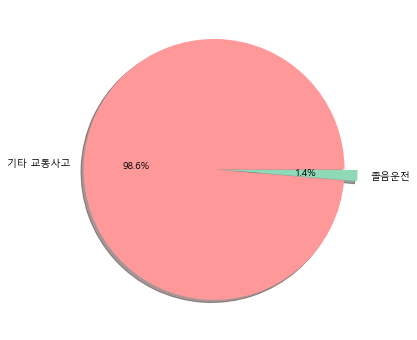

In [11]:
# 교통사고와 졸음운전 피해본 사람의 비율

ratio = [df_accident.sum()['사망자수']+df_accident.sum()['부상자수']-( df_sleep.sum()['사망자수']+df_sleep.sum()['부상자수']), df_sleep.sum()['사망자수']+df_sleep.sum()['부상자수']]
print(ratio)

explode = [0.05, 0.05]
colors = ['#ff9999', '#8fd9b6']

plt.figure(figsize=(10,6))
plt.pie(ratio, labels=['기타 교통사고', '졸음운전'], autopct='%.1f%%',
        explode=explode, colors=colors, shadow=True)

plt.show()

In [ ]:
# 전체 교통사고 사망자 중 졸음운전으로 인해 사망한 사람 비율

ratio = [df_accident.sum()['사망자수']- df_sleep.sum()['사망자수'], df_sleep.sum()['사망자수']]
print(ratio)

explode = [0.05, 0.05]
colors = ['#ff9999', '#8fd9b6']

plt.figure(figsize=(10,6))
plt.pie(ratio, labels=['기타교통사고', '졸음운전사고'], autopct='%.1f%%',
        explode=explode, colors=colors, shadow=True)
plt.savefig("졸음운전으로 사망한 사망자수.png")
plt.show()

In [ ]:
# 1. 전체운전의 부상자수와 사망자수 비율

ratio = [df_accident.sum()['부상자수'], df_accident.sum()['사망자수']]
print(ratio)

explode = [0.05, 0.05]
colors = ['#ff9999', '#8fd9b6']

plt.figure(figsize=(10,6))
plt.pie(ratio, labels=['부상자수', '사망자수'], autopct='%.1f%%',
        explode=explode, colors=colors, shadow=True)
plt.savefig("전체교통사고의부상자수와사망자수비율.png")
plt.show()

In [ ]:
# 2. 졸음운전의 부상자수와 사망자수 비율
ratio = [df_sleep.sum()['부상자수'], df_sleep.sum()['사망자수']]
print(ratio)
# 전체교통사고건수 : 졸음운전사고건수 - 파이 그래프
explode = [0.05, 0.05]
colors = ['#ff9999', '#8fd9b6']

plt.figure(figsize=(10,6))
plt.pie(ratio, labels=['부상자수', '사망자수'], autopct='%.1f%%',
        explode=explode, colors=colors, shadow=True)
plt.savefig("졸음운전사고의부상자수와사망자수비율.png")
plt.show()